In [1]:
## importing required libraries
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from google.colab import drive

In [2]:
# checking drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%pwd

'/content'

In [4]:
os.chdir("/content/drive/My Drive/Melanoma Detection")

In [5]:
%pwd

'/content/drive/My Drive/Melanoma Detection'

In [6]:
!ls

CNN_assignment


In [7]:
# Defining the path for train and test images
# Update the paths of the train and test dataset
train_data = pathlib.Path("/content/drive/My Drive/Melanoma Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
test_data = pathlib.Path("/content/drive/My Drive/Melanoma Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [8]:
train_data

PosixPath('/content/drive/My Drive/Melanoma Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [9]:
# Defining the path for train and test images
# Update the paths of the train and test dataset

image_count_train = len(list(train_data.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(test_data.glob('*/*.jpg')))
print(image_count_test)

2244
118


**<h2>Data Visualization**

**<h3>Load using keras.preprocessing**<br>
 load these images off disk using the helpful image_dataset_from_directory utility.

In [10]:
# Create a dataset
# Define some parameters for the loader:

batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [11]:
# train dataset
# using seed=123 for creating dataset
# resizing images
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2244 files belonging to 9 classes.
Using 1796 files for training.


In [12]:
#validation dataset
# using seed=123 for creating dataset
# resizing images
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2244 files belonging to 9 classes.
Using 448 files for validation.


In [13]:
# Listing out all the classes of skin cancer and storing them in a list.
class_names = train_ds.class_names
print(" Total Number of skin cancer types are:", len(class_names),"\n","Which are -",class_names)

 Total Number of skin cancer types are: 9 
 Which are - ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


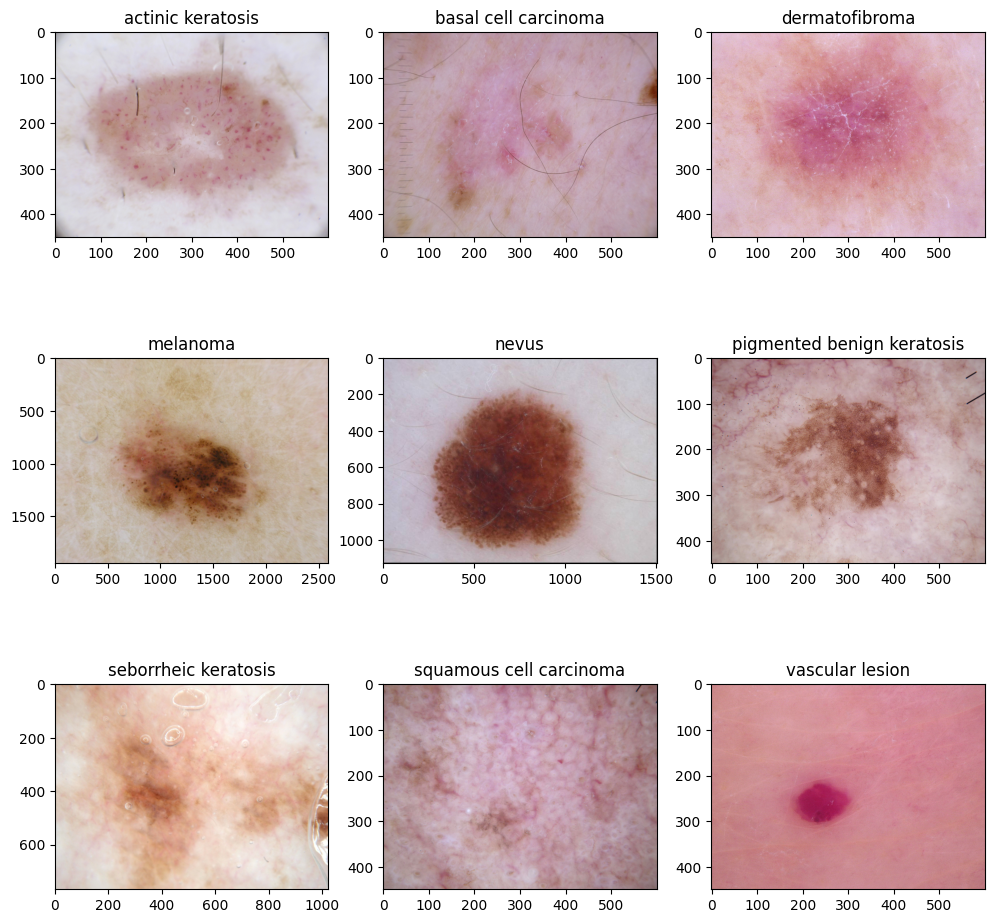

In [14]:
 #training or validation data to visualize

plt.figure(figsize=(12,12))
for i in range(len(class_names)):
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(train_data.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

**Visualize distribution of classes in the training dataset.**

In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Create the model**<br><br>
 Creating CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

In [16]:
num_classes = len(class_names)
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu'),
    # Add other layers as needed
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compile the model**<br><br>
optimizing and loss function for model training

In [17]:
# Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [18]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 180, 180, 32)        │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 180, 180, 32)        │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 90, 90, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 45, 45, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 22, 22, 64)          │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7744)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 9)                   │          69,705 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 302,761 (1.15 MB)

 Trainable params: 302,761 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

**<h2>Training the model**

In [19]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


57/57 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.1798 - loss: 2.1142 - val_accuracy: 0.2054 - val_loss: 2.0288
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.1796 - loss: 2.0323 - val_accuracy: 0.2433 - val_loss: 2.0145
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.2235 - loss: 1.9960 - val_accuracy: 0.2254 - val_loss: 1.9563
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.2010 - loss: 1.9927 - val_accuracy: 0.2366 - val_loss: 1.9891
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.2222 - loss: 1.9500 - val_accuracy: 0.2232 - val_loss: 2.0079
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.2108 - loss: 1.9961 - val_accuracy: 0.2679 - val_loss: 1.9494
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - accuracy: 0.2816 - loss: 1.9499 - val_accuracy: 0.2790 - val_loss: 1.9665
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.2407 - loss: 1.9744 - val_accuracy: 0.2589 - val

**Visualizing training results**

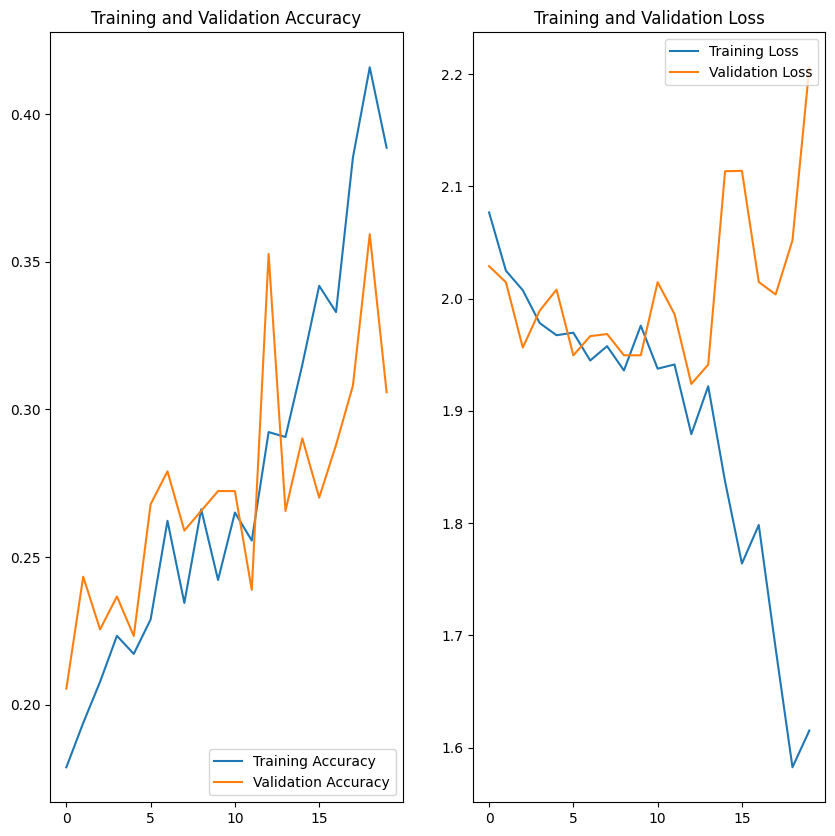

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Finding on the first base model**

The above graphs clearly indicate that the model is suffering from overfitting because we can see the difference in loss functions in training & test around the 9th epoch

The training accuracy is around 79% whereas for validation is only 49% for 20 epochs. Which clearly shows overfitting

With these combinations of parameters definetly the model is overfitting

In [21]:
data_augument = Sequential([
    layers.RandomFlip("horizontal_and_vertical", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.2, fill_mode='reflect'),
    layers.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect'),
    # Add other augmentation layers as needed
])

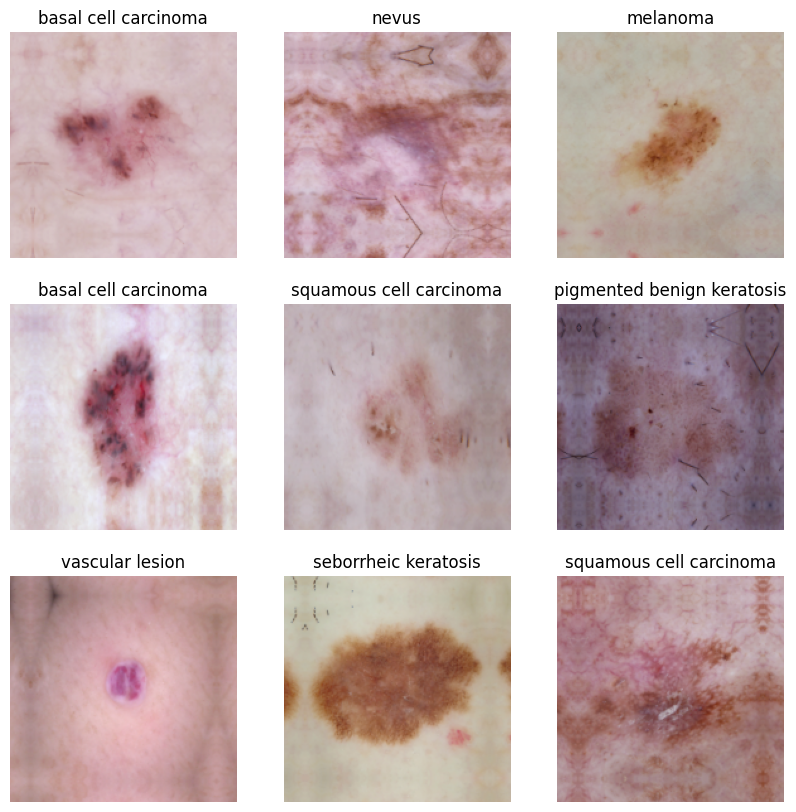

In [22]:
# visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(len(class_names)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

**Creating the model**

In [23]:
# Dropout layer if there is an evidence of overfitting
num_classes = len(class_names)
# model = Sequential([ data_augument,
#                     layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
# ])

model = Sequential([
    data_augument,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu'),
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

**<h2>Compiling the model**

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Training the model**

In [25]:
# training model for 20 epochs
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 16s 165ms/step - accuracy: 0.1718 - loss: 2.1094 - val_accuracy: 0.1875 - val_loss: 2.0498
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - accuracy: 0.1782 - loss: 2.0275 - val_accuracy: 0.1875 - val_loss: 2.0266
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 153ms/step - accuracy: 0.2147 - loss: 2.0598 - val_accuracy: 0.2076 - val_loss: 2.0494
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 152ms/step - accuracy: 0.1743 - loss: 2.0701 - val_accuracy: 0.2054 - val_loss: 2.0271
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - accuracy: 0.1973 - loss: 2.0381 - val_accuracy: 0.2165 - val_loss: 2.0614
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - accuracy: 0.1960 - loss: 2.0747 - val_accuracy: 0.2054 - val_loss: 2.0379
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - accuracy: 0.1824 - loss: 2.0157 - val_accuracy: 0.2031 - val_loss: 2.0291
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - accuracy: 0.2170 - loss: 2.0193 - val_accuracy: 

**Visualizing the results**

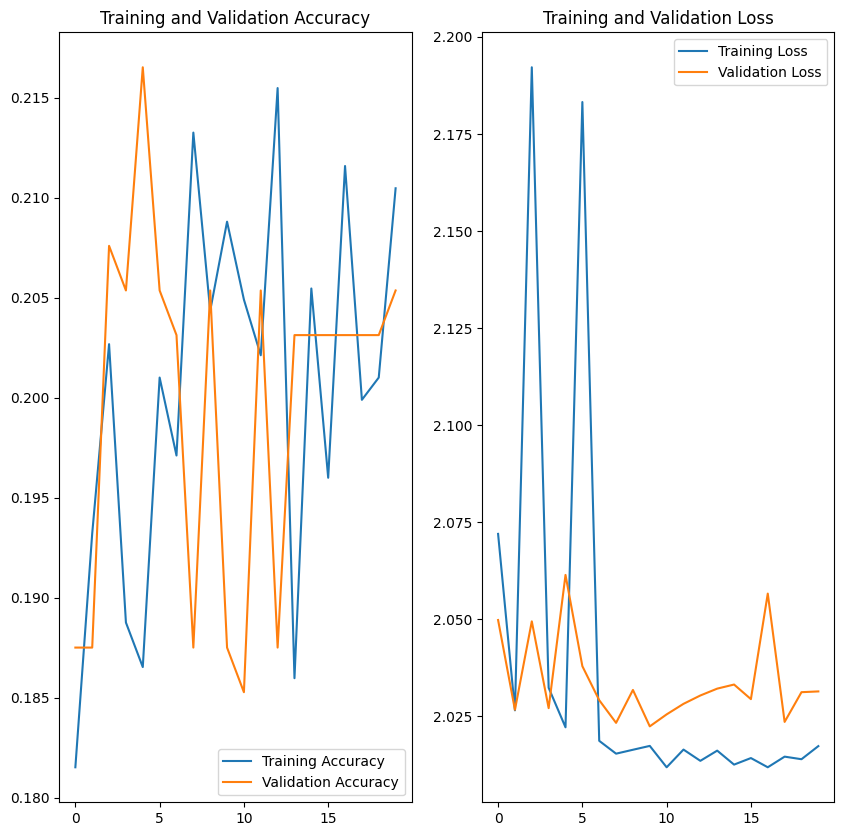

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Finding from Second Model**

Due to data augmentation, we have succefully handled the overfitting problem whereas no improment in accuracy.<br>

Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [28]:
# sanity check
path_lt=[]
lesion_lt=[]
for i in class_names:
    for j in train_data.glob(i+'/*.jpg'):
        path_lt.append(str(j))
        lesion_lt.append(i)
df_dict_original = dict(zip(path_lt, lesion_lt))
original_df = pd.DataFrame(list(df_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/My Drive/Melanoma Detection/CNN...,actinic keratosis
1,/content/drive/My Drive/Melanoma Detection/CNN...,actinic keratosis
2,/content/drive/My Drive/Melanoma Detection/CNN...,actinic keratosis
3,/content/drive/My Drive/Melanoma Detection/CNN...,actinic keratosis
4,/content/drive/My Drive/Melanoma Detection/CNN...,actinic keratosis
...,...,...
2239,/content/drive/My Drive/Melanoma Detection/CNN...,vascular lesion
2240,/content/drive/My Drive/Melanoma Detection/CNN...,vascular lesion
2241,/content/drive/My Drive/Melanoma Detection/CNN...,vascular lesion
2242,/content/drive/My Drive/Melanoma Detection/CNN...,vascular lesion


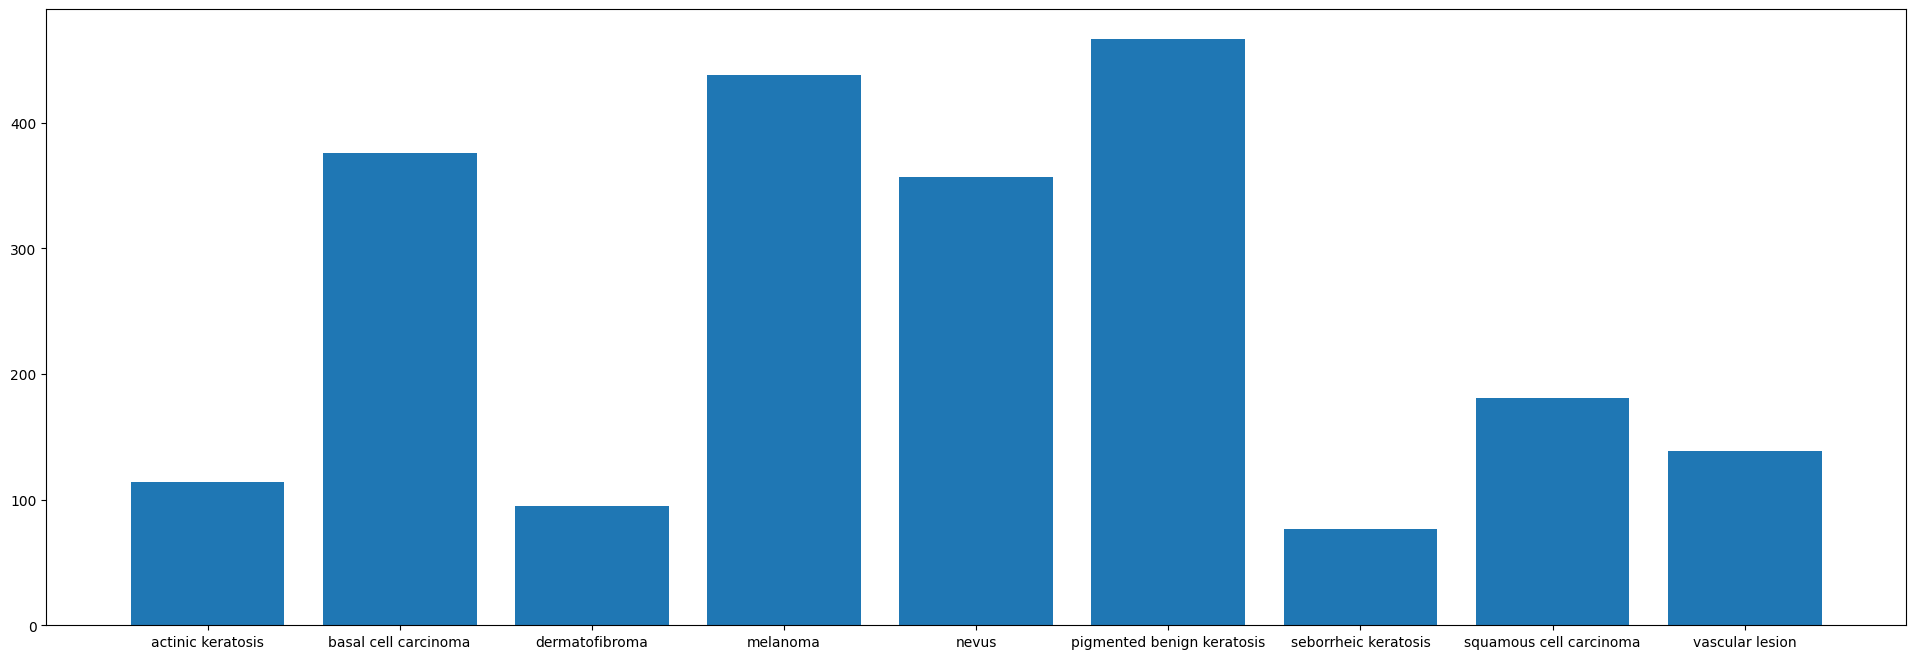

In [30]:
# To check least and dominant samples
counts=[]
for i in class_names:
    counts.append(len(list(train_data.glob(i+'/*.jpg'))))
plt.figure(figsize=(24,8))
plt.bar(class_names,counts)
plt.show()

**Seborrheic keratosis has least number of samples**

**Pigmented benign keratosis be the dominating classes followed by Melanoma**

In [31]:
!pip install Augmentor

In [32]:
path_to_training_dataset="/content/drive/My Drive/Melanoma Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset,save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) # We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2244 image(s) found.
Output directory set to /content/drive/My Drive/Melanoma Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F4D480FA800>: 100%|██████████| 500/500 [00:40<00:00, 12.47 Samples/s]


Initialised with 2244 image(s) found.
Output directory set to /content/drive/My Drive/Melanoma Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4D3A6479A0>: 100%|██████████| 500/500 [00:40<00:00, 12.30 Samples/s]


Initialised with 2244 image(s) found.
Output directory set to /content/drive/My Drive/Melanoma Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4D480EF4F0>: 100%|██████████| 500/500 [00:48<00:00, 10.32 Samples/s]


Initialised with 2244 image(s) found.
Output directory set to /content/drive/My Drive/Melanoma Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4D3A556170>: 100%|██████████| 500/500 [00:45<00:00, 10.94 Samples/s]


Initialised with 2244 image(s) found.
Output directory set to /content/drive/My Drive/Melanoma Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4D3EED9FF0>: 100%|██████████| 500/500 [00:49<00:00, 10.10 Samples/s]


Initialised with 2244 image(s) found.
Output directory set to /content/drive/My Drive/Melanoma Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4D3A6E65F0>: 100%|██████████| 500/500 [00:41<00:00, 11.99 Samples/s]


Initialised with 2244 image(s) found.
Output directory set to /content/drive/My Drive/Melanoma Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F4DCA785CF0>: 100%|██████████| 500/500 [00:43<00:00, 11.49 Samples/s]


Initialised with 2244 image(s) found.
Output directory set to /content/drive/My Drive/Melanoma Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4D3A666B90>: 100%|██████████| 500/500 [00:41<00:00, 12.17 Samples/s]


Initialised with 2244 image(s) found.
Output directory set to /content/drive/My Drive/Melanoma Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F4D3A634520>: 100%|██████████| 500/500 [00:42<00:00, 11.73 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [33]:
data_dir_train1 = pathlib.Path("/content/drive/My Drive/Melanoma Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


In [34]:
for i in class_names:
    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_lt.append(str(j))
        lesion_lt.append(i)
df_dict_original = dict(zip(path_lt, lesion_lt))
new_df = pd.DataFrame(list(df_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/drive/My Drive/Melanoma Detection/CNN...,actinic keratosis
1,/content/drive/My Drive/Melanoma Detection/CNN...,actinic keratosis
2,/content/drive/My Drive/Melanoma Detection/CNN...,actinic keratosis
3,/content/drive/My Drive/Melanoma Detection/CNN...,actinic keratosis
4,/content/drive/My Drive/Melanoma Detection/CNN...,actinic keratosis
...,...,...
6739,/content/drive/My Drive/Melanoma Detection/CNN...,vascular lesion
6740,/content/drive/My Drive/Melanoma Detection/CNN...,vascular lesion
6741,/content/drive/My Drive/Melanoma Detection/CNN...,vascular lesion
6742,/content/drive/My Drive/Melanoma Detection/CNN...,vascular lesion


**<h4>Lets see the distribution of augmented data after adding new images to the original training data.**

In [35]:
new_df['Label'].value_counts()

,count
Label,
pigmented benign keratosis,1376
melanoma,1274
basal cell carcinoma,1142
nevus,1112
squamous cell carcinoma,514
vascular lesion,434
actinic keratosis,359
dermatofibroma,297
seborrheic keratosis,236


 Added 500 images to all the classes to maintain some class balance.

**<h3>Train the model on the data created using Augmentor**

In [36]:
batch_size = 32
img_height = 180
img_width = 180

In [37]:
data_dir_train1=pathlib.Path("/content/drive/My Drive/Melanoma Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")
data_dir_train1

PosixPath('/content/drive/My Drive/Melanoma Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output')

**<h3>Create a training dataset**

In [38]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print("Images in the Training dataset:",image_count_train1)

Images in the Training dataset: 4500


In [39]:
# Only for training
data_dir_train1=pathlib.Path("/content/drive/My Drive/Melanoma Detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


**<h3>Create a validation dataset**

In [40]:
# Only for validation
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


**<h3>Create model**

In [41]:

#an evidence of overfitting in your findings
num_classes = len(class_names)
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu'),
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 **<h3>Compile model**

In [42]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**<h3>Train model**

In [43]:
epochs =30 #Train the model for ~30 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


113/113 ━━━━━━━━━━━━━━━━━━━━ 45s 345ms/step - accuracy: 0.2015 - loss: 2.0861 - val_accuracy: 0.3556 - val_loss: 1.7888
Epoch 2/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 64s 230ms/step - accuracy: 0.3255 - loss: 1.8149 - val_accuracy: 0.4144 - val_loss: 1.6462
Epoch 3/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 41s 226ms/step - accuracy: 0.3122 - loss: 1.8643 - val_accuracy: 0.3933 - val_loss: 1.6863
Epoch 4/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 42s 239ms/step - accuracy: 0.3875 - loss: 1.6485 - val_accuracy: 0.4422 - val_loss: 1.5886
Epoch 5/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 41s 238ms/step - accuracy: 0.4374 - loss: 1.5539 - val_accuracy: 0.4933 - val_loss: 1.4435
Epoch 6/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 40s 226ms/step - accuracy: 0.4908 - loss: 1.4014 - val_accuracy: 0.4478 - val_loss: 1.5603
Epoch 7/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 42s 237ms/step - accuracy: 0.5425 - loss: 1.2984 - val_accuracy: 0.4489 - val_loss: 1.5040
Epoch 8/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 41s 234ms/step - accuracy: 0.5586 - loss: 1.2332 - val

**Visualize the model results**

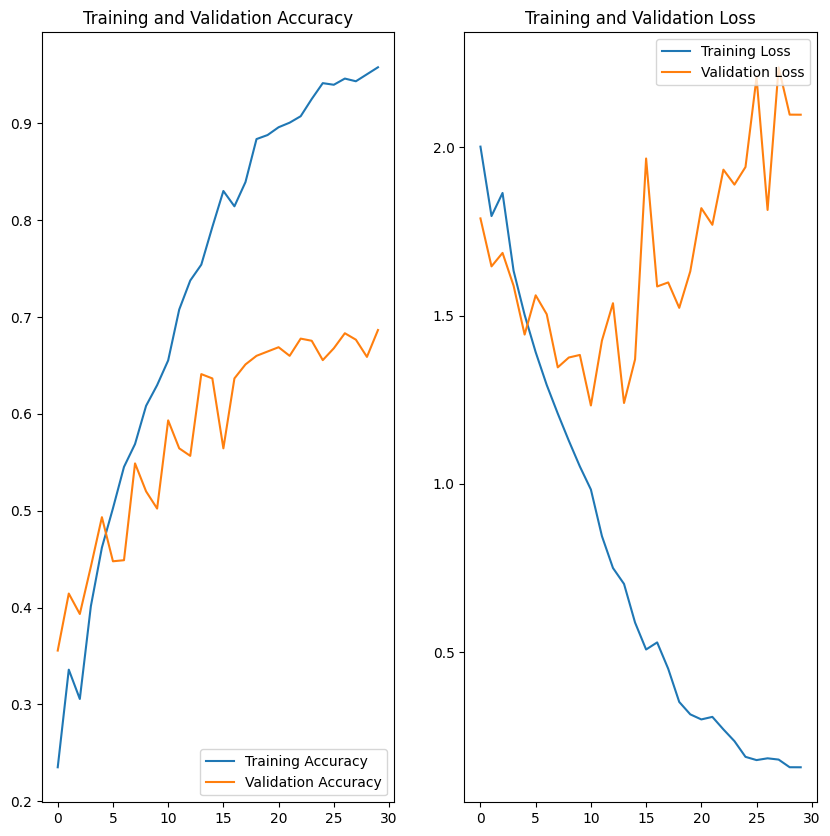

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Training Accuracy : 90% and Validation Accuracy:70%